In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

import matplotlib.pyplot as plt

In [2]:
data_dir = Path(".//data")
transformed_data_dir = Path(".//dp-plain-python//local_data//transformed_analytics")

In [3]:
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [4]:
df_features = pd.read_csv(transformed_data_dir / "feature_set.csv")

C:\Users\yame\AppData\Local\Temp\ipykernel_37468\629521941.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_features = pd.read_csv(transformed_data_dir / "feature_set.csv")


In [5]:
X = df_features[
    [
        "storey_median",
        "floor_area_sqm",
        "lease_commence_date",
        "remaining_lease_in_months",
        "distance_to_closest_mrt",
        "distance_to_closest_mall",
        "distance_to_closest_cbd",
    ]
].to_numpy()
y = df_features[["resale_price"]].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1337, test_size=0.25
)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

print(X_train)
print(y_train)

X shape: (136950, 7)
y shape: (136950, 1)
[[2.00000000e+00 5.70000000e+01 1.97100000e+03 ... 3.50447454e+02
  8.95229646e+02 6.58580318e+03]
 [2.00000000e+00 1.59000000e+02 1.98600000e+03 ... 1.09680983e+03
  9.98011975e+02 1.68443865e+04]
 [8.00000000e+00 1.10000000e+02 2.00200000e+03 ... 7.33221491e+02
  6.43141036e+02 1.79203952e+04]
 ...
 [8.00000000e+00 1.20000000e+02 1.98600000e+03 ... 1.60363501e+02
  1.07310817e+03 9.36217752e+03]
 [5.00000000e+00 1.03000000e+02 1.98500000e+03 ... 9.17315416e+02
  8.40657047e+02 1.67602144e+04]
 [1.40000000e+01 9.40000000e+01 2.01200000e+03 ... 2.31434880e+03
  2.17149057e+02 1.26607457e+04]]
[[245000.]
 [530000.]
 [500000.]
 ...
 [825000.]
 [380000.]
 [430000.]]


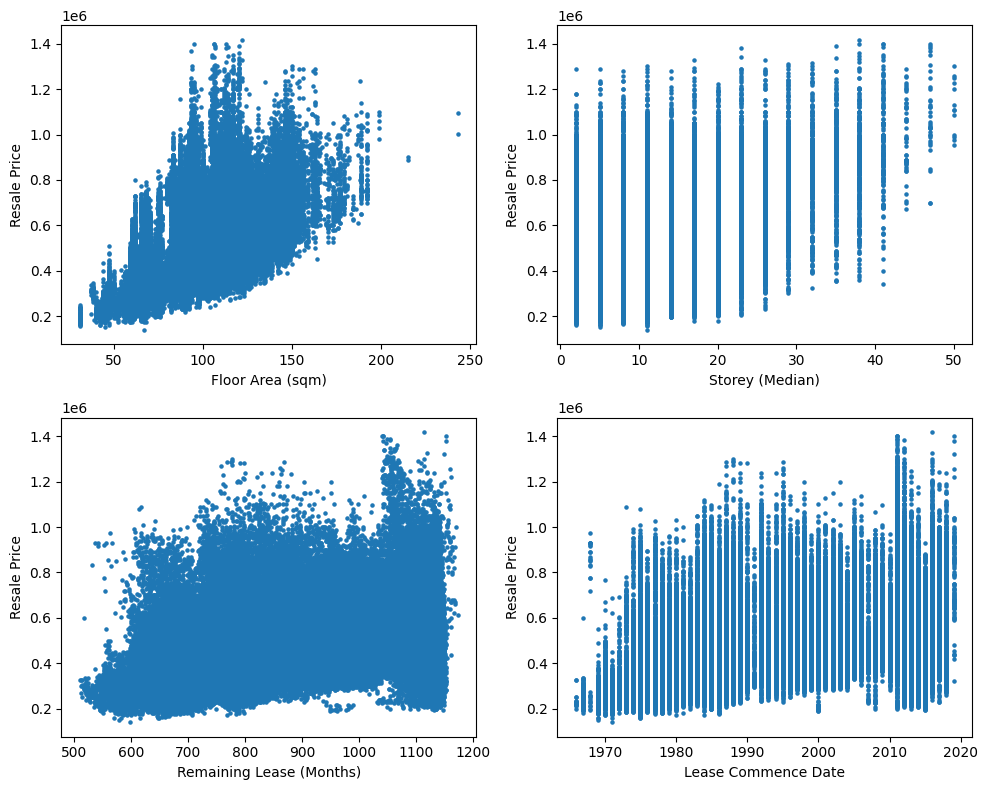

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot 1
axs[0, 0].scatter(df_features["floor_area_sqm"], df_features["resale_price"], s=5)
axs[0, 0].set_xlabel("Floor Area (sqm)")
axs[0, 0].set_ylabel("Resale Price")

# Plot 2
axs[0, 1].scatter(df_features["storey_median"], df_features["resale_price"], s=5)
axs[0, 1].set_xlabel("Storey (Median)")
axs[0, 1].set_ylabel("Resale Price")

# Plot 3
axs[1, 0].scatter(df_features["remaining_lease_in_months"], df_features["resale_price"], s=5)
axs[1, 0].set_xlabel("Remaining Lease (Months)")
axs[1, 0].set_ylabel("Resale Price")

# Plot 4
axs[1, 1].scatter(df_features["lease_commence_date"], df_features["resale_price"], s=5)
axs[1, 1].set_xlabel("Lease Commence Date")
axs[1, 1].set_ylabel("Resale Price")

plt.tight_layout()
plt.show()

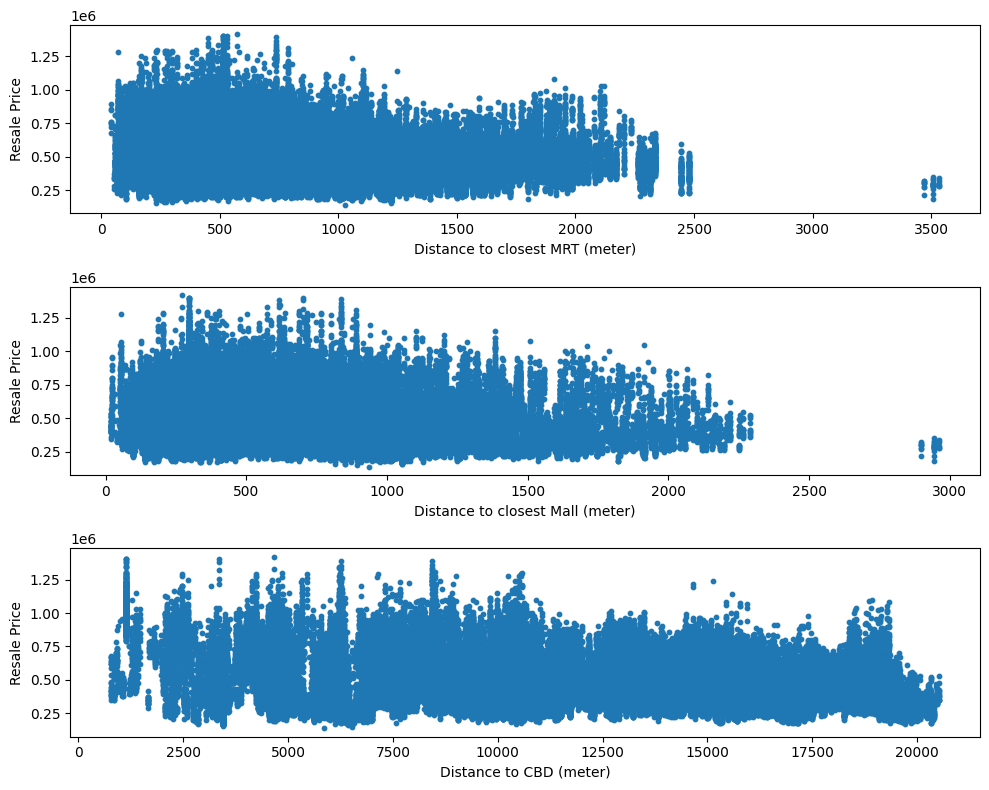

In [7]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Plot 1
axs[0].scatter(df_features["distance_to_closest_mrt"], df_features["resale_price"], s=10)
axs[0].set_xlabel("Distance to closest MRT (meter)")
axs[0].set_ylabel("Resale Price")

# Plot 2
axs[1].scatter(df_features["distance_to_closest_mall"], df_features["resale_price"], s=10)
axs[1].set_xlabel("Distance to closest Mall (meter)")
axs[1].set_ylabel("Resale Price")

# Plot 3
axs[2].scatter(df_features["distance_to_closest_cbd"], df_features["resale_price"], s=10)
axs[2].set_xlabel("Distance to CBD (meter)")
axs[2].set_ylabel("Resale Price")

plt.tight_layout()
plt.show()

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train.ravel())

y_train_pred = linreg_model.predict(X_train)
y_test_pred = linreg_model.predict(X_test)
print(f"R^2 Score on Training:{metrics.r2_score(y_train, y_train_pred)}")
print(f"R^2 Score on Test:{metrics.r2_score(y_test, y_test_pred)}")

print()

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
mape = np.mean(np.abs((y_test - y_test_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

print()

importance = linreg_model.coef_
for i,v in enumerate(importance):
    print(f'Feature: {i}, Score: {v}')

R^2 Score on Training:0.8140265025620046
R^2 Score on Test:0.8128896716615768

Mean Absolute Error (MAE): 54140.25453339771
Mean Squared Error (MSE): 5031981373.299816
Root Mean Squared Error (RMSE): 70936.46011255296
Mean Absolute Percentage Error (MAPE): 38.96
Accuracy: 61.04

Feature: 0, Score: 31764.81325141164
Feature: 1, Score: 112122.5962811862
Feature: 2, Score: 337199.0140759483
Feature: 3, Score: -277575.87000119395
Feature: 4, Score: -28070.795705723976
Feature: 5, Score: 743.5364897293111
Feature: 6, Score: -78043.64109115179


In [10]:
from sklearn.ensemble import RandomForestRegressor

randomforest_model = RandomForestRegressor()
randomforest_model.fit(X_train, y_train.ravel())

RandomForestRegressor()

In [11]:
y_test_pred = randomforest_model.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
mape = np.mean(np.abs((y_test - y_test_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

print()

importance = randomforest_model.feature_importances_
for i,v in enumerate(importance):
    print(f'Feature: {i}, Score: {v}')

Mean Absolute Error (MAE): 20628.812034353265
Mean Squared Error (MSE): 851399421.1314291
Root Mean Squared Error (RMSE): 29178.74947854053
Mean Absolute Percentage Error (MAPE): 39.14
Accuracy: 60.86

Feature: 0, Score: 0.039538541212745026
Feature: 1, Score: 0.45313902002879985
Feature: 2, Score: 0.13158741266447854
Feature: 3, Score: 0.057056002482914606
Feature: 4, Score: 0.032748428178834804
Feature: 5, Score: 0.022464355590883715
Feature: 6, Score: 0.26346623984134343


In [12]:
from sklearn.svm import SVR

lin_svr_model = SVR(kernel='linear')
lin_svr_model.fit(X_train, y_train.ravel())


print(lin_svr_model.score(X_train, y_train))
print(lin_svr_model.score(X_test, y_test))

0.4329667338268727
0.43062459798190833


In [13]:
y_train_pred = lin_svr_model.predict(X_train)
y_test_pred = lin_svr_model.predict(X_test)
print(f"R^2 Score on Training:{metrics.r2_score(y_train, y_train_pred)}")
print(f"R^2 Score on Test:{metrics.r2_score(y_test, y_test_pred)}")

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
mape = np.mean(np.abs((y_test - y_test_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))


R^2 Score on Training:0.4329667338268727
R^2 Score on Test:0.43062459798190833
Mean Absolute Error (MAE): 89420.90559767993
Mean Squared Error (MSE): 15312283628.662655
Root Mean Squared Error (RMSE): 123742.8124323294
Mean Absolute Percentage Error (MAPE): 28.54
Accuracy: 71.46


In [15]:
lin_svr_model = SVR(kernel='poly')
lin_svr_model.fit(X_train, y_train.ravel())


print(lin_svr_model.score(X_train, y_train))
print(lin_svr_model.score(X_test, y_test))

0.08443952629665175
0.07911588309405548


In [17]:
y_train_pred = lin_svr_model.predict(X_train)
y_test_pred = lin_svr_model.predict(X_test)
print(f"R^2 Score on Training:{metrics.r2_score(y_train, y_train_pred)}")
print(f"R^2 Score on Test:{metrics.r2_score(y_test, y_test_pred)}")

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
mape = np.mean(np.abs((y_test - y_test_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))


R^2 Score on Training:0.08443952629665175
R^2 Score on Test:0.07911588309405548
Mean Absolute Error (MAE): 117744.98557202432
Mean Squared Error (MSE): 24765451294.902115
Root Mean Squared Error (RMSE): 157370.42700235045
Mean Absolute Percentage Error (MAPE): 26.48
Accuracy: 73.52


In [18]:
rbf_svr_model = SVR(kernel='rbf')
rbf_svr_model.fit(X_train, y_train.ravel())


print(rbf_svr_model.score(X_train, y_train))
print(rbf_svr_model.score(X_test, y_test))

-7.712515506286266e-05
-0.004248477204586765


In [19]:
y_train_pred = rbf_svr_model.predict(X_train)
y_test_pred = rbf_svr_model.predict(X_test)
print(f"R^2 Score on Training:{metrics.r2_score(y_train, y_train_pred)}")
print(f"R^2 Score on Test:{metrics.r2_score(y_test, y_test_pred)}")

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
mape = np.mean(np.abs((y_test - y_test_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))


R^2 Score on Training:-7.712515506286266e-05
R^2 Score on Test:-0.004248477204586765
Mean Absolute Error (MAE): 121885.64325309801
Mean Squared Error (MSE): 27007379423.322166
Root Mean Squared Error (RMSE): 164339.22058754618
Mean Absolute Percentage Error (MAPE): 26.28
Accuracy: 73.72
